## Linear Model

Linear regression is a very simple approach for supervised learning. It's a useful tool for predicting a quantitative response. It has been around for quite a long time and is the topic of innumerable textbooks. Though it may seem too simple when compared to advanced models, it still works widely as a statistical learning method.

Although simple, linear regression can work as a great benchmark when we are training our statistical learning model. And beyond linear regression, we can have many generalizations and extensions which make simple linear regression powerful.

So it is very important to have a deep understanding of linear regression and learn basic statistical learning essentials based on this simple but important model.

### Linear regression with **Normal Equation**

In [30]:
# Common imports
import numpy as np
import pandas as pd
import os, sys

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whiteg'
              ''
              'rid')

import warnings
warnings.filterwarnings(action="ignore")

### Linear Regression Models and Ordinary Least Squares (OLS)

#### Model assumption:
$$y =X\beta + \epsilon $$
OR 
$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon$$
There are lots of different model assumptions for linear model. In our case, to make it comparable to other models and put it simply, we can presume such points:

1. Linear relationship: Y can be expressed as a linear expression of X
2. Random sampling: not all the $X_i$ are the same
3. $E[\epsilon] = 0, E[\epsilon|X] = 0$, which indicates that $\epsilon$ is just white noise, if $\epsilon$ is not around 0, we can shift part of the residual to the intercept term 
4. No perfect colinearity in $X$: otherwise we can express those variables as linear combination of other dimensions

Here in this model expression, inside $X$ we already have intercept $\beta_0$. $X^T = (1, X_1, X_2, ... ,X_p)$ where $1$ is the vector of all numbers 1. 

$$
X = \begin{bmatrix}
1 & x_{11} & x_{12} & ... & x_{1p}\\
1 & x_{21} & x_{22} & ... & x_{2p}\\
... & ... & ... & ... & ...\\
1 & x_{N1} & x_{N2} & ... & x_{Np}\\
\end{bmatrix}
$$ 

Here $N$ is the number of total samples and p is the number of total features. So considering the intercept, totally in $X$ the shape is $N \times(p+1)$

#### Loss function:
Here in linear regression, we can easily define loss function as of **MSE: mean square error**
$$RSS(\beta) = \sum_{i=1}^N(y_i - f(x_i))^2 = \sum_{i=1}^N(y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j)^2$$

Or equivalently:
$$RSS(\beta) = (y- X\beta)^T(y - X\beta)$$

How to solve this?
$$\frac{\partial RSS(\beta)}{\partial \beta} = -2X^T(y-X\beta)$$
$$\frac{\partial^2 RSS(\beta)}{\partial \beta \partial \beta^T} = 2X^TX$$

If $X$ is full rank (here we only consider full rank), $X^TX$ is positive definite, so based on the first order condition:
$$\frac{\partial RSS(\beta)}{\partial \beta} = 0$$
We can get 
$$X^T(y-X\beta) = 0$$
So
$$\hat{\beta} = (X^TX)^{-1}X^Ty$$
Here $\hat{}$ means the estimation of the parameter

To better illustrate and visualize some examples, we will start from univariable regression as $y  \sim X$

In [31]:
## generate samples
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 + 4 * X + np.random.randn(100, 1)

[-1, 3, -2, 15]

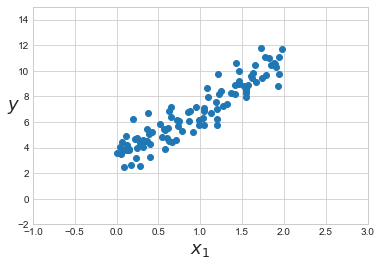

In [32]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(X, y)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
ax.axis([-1, 3, -2, 15])



Based on our normal equation 
$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

We can do like this:

In [33]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance, which is the intercept
beta_estimation = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
beta_estimation

array([[3.21509616],
       [3.77011339]])

Now lets fit some new points:

In [34]:
X_new = np.array([[-0.5], [2.5]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance, as intercept
y_predict = X_new_b.dot(beta_estimation)
## beta_estimation[0] + -0.5*beta_estimation[1]
y_predict

array([[ 1.33003946],
       [12.64037962]])

[-1, 3, -2, 15]

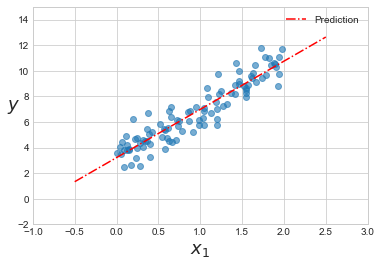

In [35]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(X, y, alpha=0.6)
ax.plot(X_new, y_predict, 'r-.', label='Prediction')
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
ax.legend()
ax.axis([-1, 3, -2, 15])


Or we can do sepecifically for univariable regression:

$$\hat{\beta_1} = \frac{S_{xy}}{S_{xx}} = \frac{\sum (X_i - \bar{X})(y_i - \bar{y})} {\sum (X_i - \bar{X})(X_i - \bar{X})}$$

$$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{X}$$

In [36]:
Sxx = 0
Sxy = 0

Sxx = np.sum(np.power(X-np.mean(X),2))
Sxy = np.sum((X-np.mean(X))*(y-np.mean(y)))
    
sBeta_1 = Sxy/Sxx
sBeta_0 = np.mean(y) - sBeta_1*np.mean(X)
sBeta_0,sBeta_1

(3.215096157546748, 3.7701133864384833)

### First touch with Scikit learn

We can also use **scikit learn** model to solve this problem:

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.21509616]), array([[3.77011339]]))

In [38]:
## Compare the difference
np.allclose(beta_estimation.reshape(-1) , np.array([lin_reg.intercept_[0], lin_reg.coef_[0][0]]))

True

In [39]:
X_new

array([[-0.5],
       [ 2.5]])

In [40]:
lin_reg.predict(X_new)

array([[ 1.33003946],
       [12.64037962]])

[-1, 3, -2, 15]

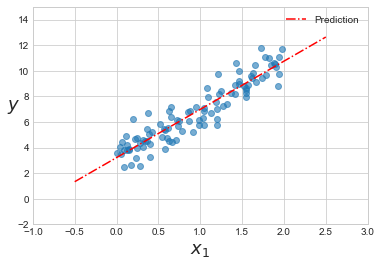

In [41]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(X, y, alpha=0.6)
ax.plot(X_new, lin_reg.predict(X_new), 'r-.', label='Prediction')
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
ax.legend()
ax.axis([-1, 3, -2, 15])


But in reality, sklearn do not solve OLS merely based on normal equation, but ultimately depends on the SVD matrix decomposition. Just imagine the case when $X^TX$ is not full rank.

### Gradient descent:
It's lucky that the OLS has an explicit mathematical formula for the solution. But it's not always the case, as we can see for other models later. So how can we deal with that?

Another important approach for solving these questions is **gradient descent**.

**Gradient Descent** is a general approach for solving optimization problems, especially for convex optimization problems. In a convex problem, gradient descent can always find global optimal solution via exploring the solution surface.

And the general expression of gradient descent is super simple and intuitive:
$$\theta^{(nextstep)} = \theta - \eta \nabla_{\theta}LOSS(\theta)$$

Where $\theta$ is our target parameter sets, $\eta$ is usually called learning rate. $\nabla_{\theta}LOSS(\theta)$ is the gradient of the loss function.

But in reality we need to take care of the gradient computation and tuning the hyper-parameters.

In our linear regression problem, the loss function is $MSE(\beta)$, and we can easily compute the gradient of the loss function:$$\frac{\partial{MSE(\beta)}}{\partial{\beta_j}} = \frac{2}{m}\sum_{i=1}^{m}(\beta^Tx^{(i)} - y^{(i)})x_{j}^{(i)}$$
Where $j$ is the dimension and $i$ goes through all the samples.

In [42]:
X.shape

(100, 1)

In [43]:
## Learning rate
eta = 0.1
num_iterations = 1000
total_num_of_samples = X.shape[0]
## initialize the parameter
beta_byGradientDescent = np.random.randn(2,1)

beta_byGradientDescent_path = []
for each_iteration in range(num_iterations):
    gradients = 2/total_num_of_samples * X_b.T.dot(X_b.dot(beta_byGradientDescent) - y)
    beta_byGradientDescent = beta_byGradientDescent - eta * gradients
    beta_byGradientDescent_path.append(beta_byGradientDescent)

In [44]:
beta_byGradientDescent

array([[3.21509616],
       [3.77011339]])

In [45]:
beta_estimation

array([[3.21509616],
       [3.77011339]])

Gradient descent gives us almost the same result as of normal equation.

In [46]:
np.allclose(beta_byGradientDescent, beta_estimation)

True

### Stochastic Gradient Descent
As we can see from the formula and code, gradient descent needs to use the whole training data to calculate the gradient, which can be slow especially when the dataset is very large. Another way to fast the approach is to adjust the gradient computation to be based on single random data point rather than the whole training set. Which is called **stochastic gradient descent**, a.k.a. **SGD**

In [47]:
## Stochastic gradient descent looping times
n_epochs = 500
## fix learning rate
eta = 0.001
total_num_of_samples = X.shape[0]


beta_SGD = np.random.randn(2,1)  # random initialization

beta_SGD_path = []
for each_epoch in range(n_epochs):
    for i in range(total_num_of_samples):
        
        random_index = np.random.randint(total_num_of_samples)
        ## Every time pick 1 single data point
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(beta_SGD) - yi)
        beta_SGD = beta_SGD - eta * gradients
        beta_SGD_path.append(beta_SGD)

In [48]:
beta_SGD

array([[3.25314299],
       [3.82984675]])

We can see that even if not exactly the same as previous result, but we are very close to it.

In [49]:
def learning_schedule(t):
    t0, t1 = 1, 100  # learning schedule hyperparameters
    return t0 / (t + t1)
        
## Stochastic gradient descent looping times
n_epochs = 50
total_num_of_samples = X.shape[0]

beta_SGD2 = np.random.randn(2,1)  # random initialization

beta_SGD2_path = []
for each_epoch in range(n_epochs):
    for i in range(total_num_of_samples):
        
        random_index = np.random.randint(total_num_of_samples)
        ## Every time pick 1 single data point
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        ## update learning schedule
        eta = learning_schedule(each_epoch*total_num_of_samples + i)
#         eta = 0.001
        gradients = 2 * xi.T.dot(xi.dot(beta_SGD) - yi)
        beta_SGD2 = beta_SGD2 - eta * gradients
        beta_SGD2_path.append(beta_SGD2)

In [50]:
beta_SGD2

array([[-1.92518915],
       [-0.24495324]])

As we can see SGD cannot guarantee the convergence of the optimization. Sometimes we also need to take care of tuning the hyper-parameters.


SGD is also implemented in scikit-learn as a built-in API.

In [51]:
from sklearn.linear_model import SGDRegressor
## max_iter is the number of maximum epoches, tol is the converging tolerance, eta is the learning rate
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=0)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=0,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [52]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.21101192]), array([3.7665544]))

Furthermore, we can combine gradient descent with stochastic gradient descent together, stochastically deal with batch data, in order to improve the stability and speed of both algorithm. This is known as **Mini-batch Gradient Descent**. As indicated from the name, in **Mini-batch Gradient Descent**, we re-organize the whole batch of data into several mini batches, and then apply stochastic gradient descent on them, each mini-batch as a data point in SGD.

In [53]:
n_epoches = 200
minibatch_size = 20
total_num_of_samples = X.shape[0]

np.random.seed(42)

beta_minibatch = np.random.randn(2,1)  # random initialization
eta = 0.005

beta_minibatch_path = []
for each_epoch in range(n_epoches):
    ## re-organize original dataset
    shuffled_indices = np.random.permutation(total_num_of_samples)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, total_num_of_samples, minibatch_size):
        ## select mini batch of the data
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        
        ## Gradient computation is the same as batch gradient descent
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(beta_minibatch) - yi)
        beta_minibatch = beta_minibatch - eta * gradients
        beta_minibatch_path.append(beta_minibatch)

In [54]:
beta_minibatch

array([[3.29100691],
       [3.70415877]])

We can also compare the trajectory of those different algorithms when we are doing the optimization:

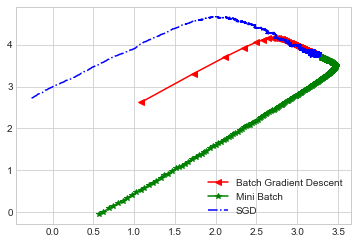

In [29]:
toNpArray = lambda l : np.array(l)
optpaths= {'Batch Gradient Descent' : (toNpArray(beta_byGradientDescent_path), 'r-<'), 
           'Mini Batch' : (toNpArray(beta_minibatch_path), 'g-*'),
           'SGD' : (toNpArray(beta_SGD_path), 'b-.')}

fig = plt.figure()
ax = plt.axes()
for each_key in optpaths.keys():
    current_series = optpaths.get(each_key)[0]
    current_style = optpaths.get(each_key)[1]
    
    ax.plot(current_series[:,0], current_series[:,1], current_style,label = each_key)

ax.legend()